In [14]:
from __future__ import division
import os
import re
import time

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile

import numpy as np
import pandas as pd

import cPickle as pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier as RF

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import src.data_pipeline as dpl
import src.fsm2 as fsm
import src.predict_one as p_1
import src.evaluator as ev

# Functions:

In [135]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels)+1)
    ytick_marks = np.arange(len(pred_labels)+1)
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 8
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    
    
def plot_percent_matrix(array):
    cm_array = confusion_matrix(y_true,y_pred)
#    percent_array =
# Dynamically create percent array
# Search cm_array replace w/ percent array 

    true_labels = np.unique(y_test)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Percent True', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels)+1)
    ytick_marks = np.arange(len(pred_labels)+1)
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 8
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    
def plot_probs(probs, save = False):
    
    # un-hard code groups
    groups = ['Canine', 'Feline', 'Other', 'Small', 'Ungulate']

    to_plot = pd.DataFrame(groups, columns = ['groups'])
    to_plot['probs'] = probs[0]

    to_plot.sort_values('probs', axis=0, ascending=True, inplace=True, kind='mergesort')
    print to_plot

    fig, ax = plt.subplots(figsize=(7,3))
    plt.title('Model Prediction: '+pred[0])
    plt.ylabel('Species Group')
    plt.xlabel('Prediction Strength')
    ax.set_yticklabels(to_plot['groups'], rotation=50, ha='right')

    plt.barh(range(0,5), to_plot['probs'], color='#6982A0', alpha=0.8)
    
    if save:
        plt.savefig('prediction_strength.png', bbox_inches='tight')

    plt.show()

# Data / Model

In [95]:
# data and model for testing
F,L,paths = fsm.prep_data('second_sample_data', drop_blank=True)

svm = fsm.create_SVC()
model, X_test, y_test, y_pred, y_prob = fsm.run_fit(svm,F,L)

Keyword Value Counts: 
[u'snowshoe hare']               928
[u'White-tailed deer']           123
[u'coyote']                       83
[u'unidentified']                 72
[u'mouse']                        61
[u'mule deer']                    36
[u'Canada lynx']                  34
[u'elk']                          34
[u'red squirrel']                 17
[u'domestic dog']                 12
[u'Robin']                        10
[u'Camera Check']                 10
[u'bobcat']                        9
[u'striped skunk']                 9
[u'cougar']                        6
[u'bird']                          6
[u'northern flying squirrel']      5
[u'Wolverine']                     3
[u'Squirrel (unidentified)']       3
[]                                 1
[u'chipmunk']                      1
[u'Squirrel']                      1
Name: keywords, dtype: int64

1 photos have a blank keyword entries
dropping blank

dropping "Hare" for balance


In [ ]:
dpl.process_photos('data/first_sample', dataset_name = 'first_sample_data')

In [96]:
F_unseen, L_unseen, paths_unseen = fsm.prep_data('first_sample_data', drop_blank=True)

Keyword Value Counts: 
[]                   9
[u'deer']            7
[u'mule deer']       7
[u'hoary marmot']    4
[u'marmot']          4
[u'Camera Check']    1
[u'camera check']    1
[u'unidentified']    1
Name: keywords, dtype: int64

9 photos have a blank keyword entries
dropping blank

the following labels were missed
["[u'camera check']" "[u'marmot']" "[u'deer']"]
dropping rows with these labels
dropping "Hare" for balance


# de-manual-ize Percent Matrix

In [184]:
# confusion matrix drops entries with no test values
# this prevents cm_report from working

print L_unseen.value_counts()
pred_nuloc = model.predict(F_unseen)
ev.cm_report(L, L_unseen, pred_nuloc)

Ungulate    7
Other       6
Name: keywords, dtype: int64
Total value counts: 
Ungulate    193
Small       104
Canine       95
Other        94
Feline       49
Name: keywords, dtype: int64

Test set value counts:
Ungulate    7
Other       6
Name: keywords, dtype: int64

Test Confusion Matrix:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 4]
 [0 0 0 0 0]
 [0 0 0 0 7]]

Percentage True in each predicted class
[[   0.      0.      0.      0.      0.  ]
 [   0.      0.      0.      0.      0.  ]
 [   0.      0.     33.33    0.     66.67]
 [   0.      0.      0.      0.      0.  ]
 [   0.      0.      0.      0.    100.  ]]




# plot P1 results

In [5]:
pred, probs = p_1.predict('data/mossy2.jpg', model = 'data/svm.pkl')

Processing data/mossy2.jpg...


     groups     probs
0    Canine  0.002268
3     Small  0.005322
1    Feline  0.007595
4  Ungulate  0.051151
2     Other  0.933665


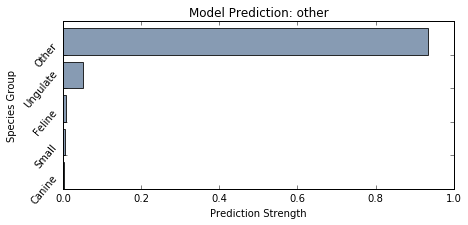

In [6]:
plot_probs(probs)